# Final pickled model for Flask App ANd API

Name- Sapna Sharma

Batch- 23rd Aprril 2023

Project Name -  Live Project 1: Chemical Property Modelling in association with asktalos.com and UltraTech Cement Limited and Aditya Birla Group

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
from scipy import stats
import numpy as np
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer

In [2]:
data = pd.read_csv(r"C:\Users\sapna\Desktop\project Ask Talos\project ask talos (Material Compressive Strength Experimental Data (1) ).csv")

In [3]:
data

,Material Quantity (gm),Additive Catalyst (gm),Ash Component (gm),Water Mix (ml),Plasticizer (gm),Moderate Aggregator,Refined Aggregator,Formulation Duration (hrs),Compression Strength MPa
0,486.42,180.60,21.26,201.66,16.11,1151.17,708.50,344.43,79.89
1,133.32,260.14,185.60,175.99,6.27,1090.57,1010.25,28.86,59.80
2,559.97,2.84,111.76,295.23,11.95,1024.93,810.69,237.68,77.86
3,391.43,351.05,76.39,299.14,19.00,1134.88,881.34,208.81,71.74
4,394.78,352.61,194.35,235.54,17.02,1098.24,781.01,266.84,76.07
...,...,...,...,...,...,...,...,...,...
6134,188.78,162.30,142.65,163.66,15.98,1003.82,1002.47,357.91,50.61
6135,349.87,291.45,77.82,188.26,25.82,925.10,1005.31,104.20,54.24
6136,358.29,22.70,17.99,208.58,34.91,1081.07,792.44,302.76,56.57
6137,445.25,275.59,178.86,191.77,18.07,865.15,833.10,374.63,58.21


# Checking for missing values:

In [4]:
#Check for missing values
missing_values = data.isnull().sum()

In [5]:
missing_values

Material Quantity (gm)        109
Additive Catalyst (gm)        109
Ash Component (gm)            109
Water Mix (ml)                109
Plasticizer (gm)              109
Moderate Aggregator           109
Refined Aggregator            109
Formulation Duration (hrs)    109
Compression Strength MPa        0
dtype: int64

# Remove rows with any missing values

In [6]:
# Remove rows with any missing values
data.dropna(inplace=True)

In [7]:
data.isnull().sum()

Material Quantity (gm)        0
Additive Catalyst (gm)        0
Ash Component (gm)            0
Water Mix (ml)                0
Plasticizer (gm)              0
Moderate Aggregator           0
Refined Aggregator            0
Formulation Duration (hrs)    0
Compression Strength MPa      0
dtype: int64

# Number of rows left after removing missing values in rows

In [8]:
data.shape

(6030, 9)

# Identifying outliers in each numerical column using Z-scores or IQR.
Handle outliers by removing or transforming them, depending on the nature of the data.

In [9]:
from scipy import stats
import numpy as np

# Specify the Z-score threshold (e.g., 3 standard deviations)
z_threshold = 3

# Calculate Z-scores for each numerical column
z_scores = np.abs(stats.zscore(data.select_dtypes(include='number')))

# Create a boolean mask to identify outliers
outlier_mask = z_scores > z_threshold

# Remove outliers or handle them as needed
cleaned_df = data[~outlier_mask.any(axis=1)]


In [10]:
cleaned_df

,Material Quantity (gm),Additive Catalyst (gm),Ash Component (gm),Water Mix (ml),Plasticizer (gm),Moderate Aggregator,Refined Aggregator,Formulation Duration (hrs),Compression Strength MPa
0,486.42,180.60,21.26,201.66,16.11,1151.17,708.50,344.43,79.89
1,133.32,260.14,185.60,175.99,6.27,1090.57,1010.25,28.86,59.80
2,559.97,2.84,111.76,295.23,11.95,1024.93,810.69,237.68,77.86
3,391.43,351.05,76.39,299.14,19.00,1134.88,881.34,208.81,71.74
4,394.78,352.61,194.35,235.54,17.02,1098.24,781.01,266.84,76.07
...,...,...,...,...,...,...,...,...,...
6134,188.78,162.30,142.65,163.66,15.98,1003.82,1002.47,357.91,50.61
6135,349.87,291.45,77.82,188.26,25.82,925.10,1005.31,104.20,54.24
6136,358.29,22.70,17.99,208.58,34.91,1081.07,792.44,302.76,56.57
6137,445.25,275.59,178.86,191.77,18.07,865.15,833.10,374.63,58.21


In [11]:
cleaned_df.shape

(6014, 9)

# Applying standardization (Z-score normalization) to numerical columns to have a mean of 0 and a standard deviation of 1. This ensures consistent scales:

In [12]:
from sklearn.preprocessing import StandardScaler

# Select the numerical columns for standardization
numerical_columns = cleaned_df.select_dtypes(include='number')

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to your data and transform the numerical columns
scaled_numerical_columns = scaler.fit_transform(numerical_columns)

# Replace the original numerical columns with the scaled ones
cleaned_df[numerical_columns.columns] = scaled_numerical_columns


C:\Users\sapna\AppData\Local\Temp\ipykernel_268\869492051.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[numerical_columns.columns] = scaled_numerical_columns


In [13]:
cleaned_df

,Material Quantity (gm),Additive Catalyst (gm),Ash Component (gm),Water Mix (ml),Plasticizer (gm),Moderate Aggregator,Refined Aggregator,Formulation Duration (hrs),Compression Strength MPa
0,0.683274,-0.121078,-1.225061,-0.543975,-0.135457,1.558632,-0.914859,1.510773,1.437657
1,-1.672649,0.475142,0.991814,-1.161318,-0.978425,0.939014,1.758491,-1.299536,0.180424
2,1.174008,-1.453541,-0.004255,1.706309,-0.491834,0.267863,-0.009508,0.560111,1.310619
3,0.049490,1.156590,-0.481381,1.800342,0.112121,1.392071,0.616414,0.303009,0.927629
4,0.071842,1.168283,1.109848,0.270812,-0.057500,1.017438,-0.272458,0.819795,1.198601
...,...,...,...,...,...,...,...,...,...
6134,-1.302613,-0.258252,0.412437,-1.457845,-0.146594,0.052020,1.689564,1.630820,-0.394686
6135,-0.227803,0.709837,-0.462091,-0.866234,0.696373,-0.752870,1.714725,-0.628596,-0.167521
6136,-0.171623,-1.304673,-1.269172,-0.377554,1.475090,0.841879,-0.171194,1.139681,-0.021709
6137,0.408583,0.590953,0.900894,-0.781821,0.032451,-1.365842,0.189033,1.779720,0.080922


# The column "Formulation Duration (hrs)" feature is right-skewed, we can consider using the Box-Cox transformation to make it more closely follow a normal distribution. The Box-Cox transformation is particularly useful for addressing right-skewed data, as it can help normalize the distribution and meet the assumptions of some statistical analyses that require normally distributed data.¶

In [14]:
#Certainly, we can find the minimum value in a specific column using Python and the Pandas library

# Find the minimum value in the "Formulation Duration (hrs)" column
min_value = cleaned_df["Formulation Duration (hrs)"].min()

# Print the minimum value
print("Minimum value:", min_value)

Minimum value: -1.4118345195294844


In [15]:
#Since the minimum value in the "Formulation Duration (hrs)" column is 16.25, we can add a small positive constant to all the values in the column to make them positive, and then apply the Box-Cox transformation if needed
# Add a small constant to make the data positive (e.g., 0.01)
constant = 0.01
cleaned_df["Formulation Duration (hrs)"] = cleaned_df["Formulation Duration (hrs)"] + constant


C:\Users\sapna\AppData\Local\Temp\ipykernel_268\3502222793.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["Formulation Duration (hrs)"] = cleaned_df["Formulation Duration (hrs)"] + constant


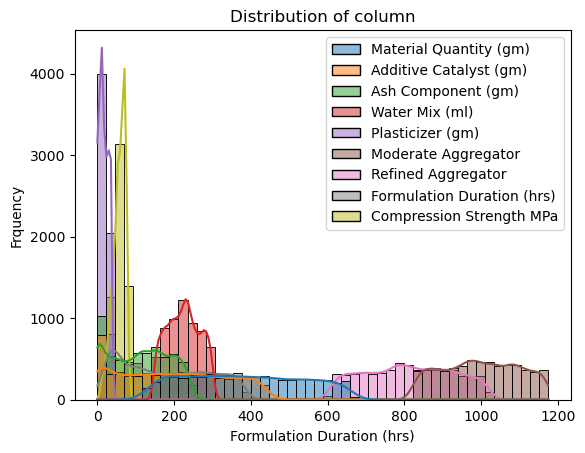

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(data, kde=True)
plt.xlabel("Formulation Duration (hrs)")
plt.ylabel("Frquency")
plt.title("Distribution of column")
plt.show()

# Feature selection process of dataset:

In [17]:
import pandas as pd
# Calculate the correlation matrix
correlation_matrix = cleaned_df.corr()

# Extract the correlation with the target variable
correlation_with_target = correlation_matrix["Compression Strength MPa"].abs()

# Sort the features by correlation
sorted_correlation = correlation_with_target.sort_values(ascending=False)

# Select the top N features
N = 9
selected_features = sorted_correlation.head(N)

# Print the selected features
print(selected_features)


Compression Strength MPa      1.000000
Formulation Duration (hrs)    0.261609
Plasticizer (gm)              0.199617
Additive Catalyst (gm)        0.182104
Material Quantity (gm)        0.124994
Ash Component (gm)            0.083022
Moderate Aggregator           0.034697
Water Mix (ml)                0.026029
Refined Aggregator            0.008912
Name: Compression Strength MPa, dtype: float64


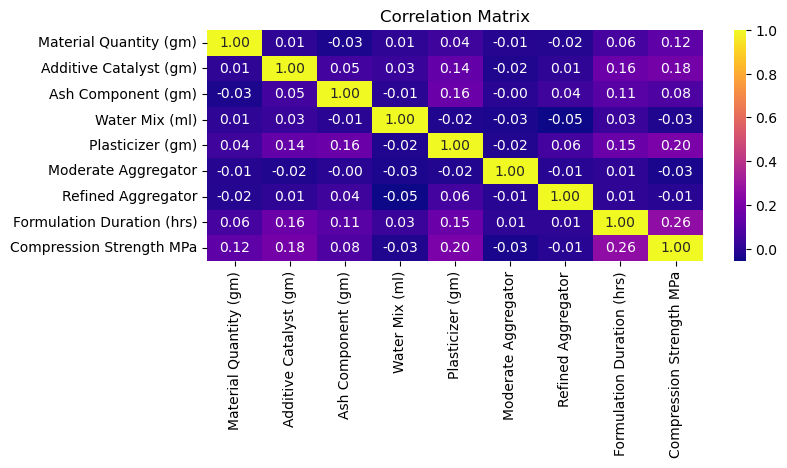

In [18]:
correlation_matrix = cleaned_df.corr()
plt.figure(figsize=(8, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Plot the co-relation of other features with Compression Strength:
The first plot creates a bar plot showing the correlation values of each feature with Compression Strength.

The second plot generates a heatmap of the correlation matrix focusing on the correlation of features with Compression Strength.

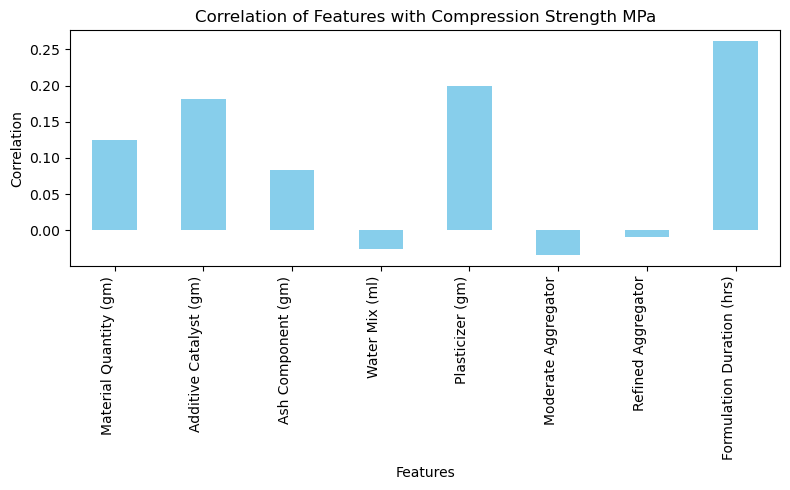

In [19]:
# Calculate correlations between independent features and Compression Strength
correlation_with_compression_strength = cleaned_df.drop(columns='Compression Strength MPa').corrwith(cleaned_df['Compression Strength MPa'])

# Create a bar plot to visualize correlations
plt.figure(figsize=(8, 5))
correlation_with_compression_strength.plot(kind='bar', color='skyblue')
plt.title('Correlation of Features with Compression Strength MPa')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

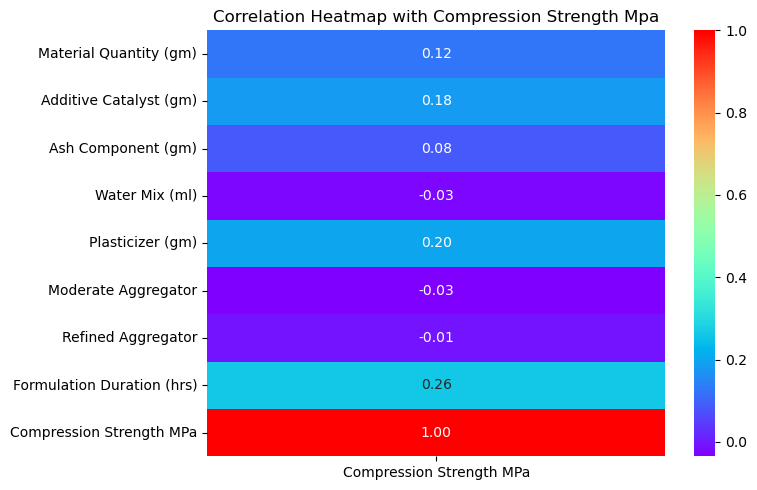

In [20]:
# Create a heatmap for correlation matrix between features and Compression Strength
plt.figure(figsize=(8, 5))
corr_matrix = cleaned_df.corr()
sns.heatmap(pd.DataFrame(corr_matrix['Compression Strength MPa']), annot=True, cmap='rainbow', fmt='.2f')
plt.title('Correlation Heatmap with Compression Strength Mpa')
plt.tight_layout()
plt.show()

# Selecting important features for modelling:
For modeling is a crucial step that involves identifying which features have the most significant impact on the target variable (in this case, 'Compression Strength MPa').

There are several methods to determine feature importance. Here are a few approaches we can consider:

# 1. Correlation Analysis:
Calculate the correlation coefficients between each feature and the target variable. Features with higher absolute correlation values (positive or negative) are generally more important.

In [21]:
correlation_matrix = cleaned_df.corr()
correlation_with_target = correlation_matrix['Compression Strength MPa'].abs().sort_values(ascending=False)
print(correlation_with_target)

Compression Strength MPa      1.000000
Formulation Duration (hrs)    0.261609
Plasticizer (gm)              0.199617
Additive Catalyst (gm)        0.182104
Material Quantity (gm)        0.124994
Ash Component (gm)            0.083022
Moderate Aggregator           0.034697
Water Mix (ml)                0.026029
Refined Aggregator            0.008912
Name: Compression Strength MPa, dtype: float64


In [22]:
cleaned_df.head(10)

,Material Quantity (gm),Additive Catalyst (gm),Ash Component (gm),Water Mix (ml),Plasticizer (gm),Moderate Aggregator,Refined Aggregator,Formulation Duration (hrs),Compression Strength MPa
0,0.683274,-0.121078,-1.225061,-0.543975,-0.135457,1.558632,-0.914859,1.520773,1.437657
1,-1.672649,0.475142,0.991814,-1.161318,-0.978425,0.939014,1.758491,-1.289536,0.180424
2,1.174008,-1.453541,-0.004255,1.706309,-0.491834,0.267863,-0.009508,0.570111,1.310619
3,0.049490,1.156590,-0.481381,1.800342,0.112121,1.392071,0.616414,0.313009,0.927629
4,0.071842,1.168283,1.109848,0.270812,-0.057500,1.017438,-0.272458,0.829795,1.198601
5,-0.921369,-1.285709,1.338901,-0.825350,-0.617765,0.588408,1.681147,0.900861,-0.326474
6,-0.350303,-0.763773,1.550957,0.845588,1.821186,1.189929,-0.911227,-1.172607,0.735509
7,1.021150,0.368026,-1.235043,1.743826,-0.089197,0.345980,0.110715,1.794440,-0.522349
8,1.228986,1.731972,1.535713,0.847993,-0.930451,0.252629,-0.160385,0.535380,0.325610
9,0.053293,0.375597,0.719190,0.708748,-1.210583,-1.367785,1.630560,-0.573445,0.821869


In [23]:
cleaned_df.shape

(6014, 9)

# 2. using Random Forest for feature importance¶
separate independent variable (X) and dependent variable(y):

In [24]:
Independent_variable= cleaned_df.drop('Compression Strength MPa',axis=1)

In [25]:
X = Independent_variable

In [26]:
X

,Material Quantity (gm),Additive Catalyst (gm),Ash Component (gm),Water Mix (ml),Plasticizer (gm),Moderate Aggregator,Refined Aggregator,Formulation Duration (hrs)
0,0.683274,-0.121078,-1.225061,-0.543975,-0.135457,1.558632,-0.914859,1.520773
1,-1.672649,0.475142,0.991814,-1.161318,-0.978425,0.939014,1.758491,-1.289536
2,1.174008,-1.453541,-0.004255,1.706309,-0.491834,0.267863,-0.009508,0.570111
3,0.049490,1.156590,-0.481381,1.800342,0.112121,1.392071,0.616414,0.313009
4,0.071842,1.168283,1.109848,0.270812,-0.057500,1.017438,-0.272458,0.829795
...,...,...,...,...,...,...,...,...
6134,-1.302613,-0.258252,0.412437,-1.457845,-0.146594,0.052020,1.689564,1.640820
6135,-0.227803,0.709837,-0.462091,-0.866234,0.696373,-0.752870,1.714725,-0.618596
6136,-0.171623,-1.304673,-1.269172,-0.377554,1.475090,0.841879,-0.171194,1.149681
6137,0.408583,0.590953,0.900894,-0.781821,0.032451,-1.365842,0.189033,1.789720


In [27]:
Dependent_variable = cleaned_df['Compression Strength MPa']

In [28]:
y = Dependent_variable

In [29]:
y

0       1.437657
1       0.180424
2       1.310619
3       0.927629
4       1.198601
          ...   
6134   -0.394686
6135   -0.167521
6136   -0.021709
6137    0.080922
6138    0.127857
Name: Compression Strength MPa, Length: 6014, dtype: float64

In [30]:
# Initialize RandomForestRegressor
rf = RandomForestRegressor()

# Fit the model
rf.fit(X, y)

# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importances)

Formulation Duration (hrs)    0.243626
Additive Catalyst (gm)        0.159474
Plasticizer (gm)              0.143251
Material Quantity (gm)        0.131188
Water Mix (ml)                0.082431
Refined Aggregator            0.082316
Ash Component (gm)            0.081063
Moderate Aggregator           0.076653
dtype: float64


# 3.Univariate Feature Selection:
Use statistical tests (like ANOVA F-test or chi-square test for classification) to select features based on their individual relationships with the target variable.

In [31]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)

feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)
print(feature_scores)

                      Feature       Score
7  Formulation Duration (hrs)  441.684962
4            Plasticizer (gm)  249.501933
1      Additive Catalyst (gm)  206.208123
0      Material Quantity (gm)   95.418550
2          Ash Component (gm)   41.726236
5         Moderate Aggregator    7.246491
3              Water Mix (ml)    4.075866
6          Refined Aggregator    0.477540


# Comparing all these three techniques to select top features:

In [32]:
# Given top features from different methods
correlation_features = ['Formulation Duration (hrs)', 'Plasticizer (gm)', 'Additive Catalyst (gm)', 'Material Quantity (gm)']
random_forest_features = ['Formulation Duration (hrs)', 'Plasticizer (gm)', 'Additive Catalyst (gm)', 'Moderate Aggregator']
univariate_features = ['Formulation Duration (hrs)', 'Plasticizer (gm)', 'Additive Catalyst (gm)', 'Ash Component (gm)']

# Combine all top features into a single list
all_top_features = (
    correlation_features +
    random_forest_features +
    univariate_features
)

# Create a DataFrame to count feature occurrences
features_count = pd.Series(all_top_features).value_counts()

# Select top 6 features based on their frequency
top_6_features = features_count.head(6).index

# Display the top 6 features
print("Top 6 Features:")
print(top_6_features)


Top 6 Features:
Index(['Formulation Duration (hrs)', 'Plasticizer (gm)',
       'Additive Catalyst (gm)', 'Material Quantity (gm)',
       'Moderate Aggregator', 'Ash Component (gm)'],
      dtype='object')


In [33]:
X_selected= top_6_features

In [34]:
X_selected

Index(['Formulation Duration (hrs)', 'Plasticizer (gm)',
       'Additive Catalyst (gm)', 'Material Quantity (gm)',
       'Moderate Aggregator', 'Ash Component (gm)'],
      dtype='object')

# Calculate percentage of correlation for each feature

In [35]:
# Select the correlation of features with the target variable ('Compression Strength MPa')
correlation_with_target = correlation_matrix['Compression Strength MPa'].abs()

# Calculate percentage of correlation for each feature
percentage_correlation = (correlation_with_target / correlation_with_target.max()) * 100

# Display the percentage of correlation for each feature
print(percentage_correlation)


Material Quantity (gm)         12.499354
Additive Catalyst (gm)         18.210432
Ash Component (gm)              8.302200
Water Mix (ml)                  2.602875
Plasticizer (gm)               19.961708
Moderate Aggregator             3.469707
Refined Aggregator              0.891206
Formulation Duration (hrs)     26.160885
Compression Strength MPa      100.000000
Name: Compression Strength MPa, dtype: float64


# Predicting modelling:
Step-1 

Perform different regression model on top of selected features:

1. Split the Data:

Divide the dataset into training and testing sets to train the models on one set and evaluate their performance on another:

In [36]:
# Selecting top features and the target variable
X = cleaned_df[['Formulation Duration (hrs)', 'Plasticizer (gm)', 'Additive Catalyst (gm)', 'Material Quantity (gm)', 'Moderate Aggregator', 'Ash Component (gm)']]
y = cleaned_df['Compression Strength MPa']  # Assuming 'Compression Strength MPa' is the target variable


In [37]:
X

,Formulation Duration (hrs),Plasticizer (gm),Additive Catalyst (gm),Material Quantity (gm),Moderate Aggregator,Ash Component (gm)
0,1.520773,-0.135457,-0.121078,0.683274,1.558632,-1.225061
1,-1.289536,-0.978425,0.475142,-1.672649,0.939014,0.991814
2,0.570111,-0.491834,-1.453541,1.174008,0.267863,-0.004255
3,0.313009,0.112121,1.156590,0.049490,1.392071,-0.481381
4,0.829795,-0.057500,1.168283,0.071842,1.017438,1.109848
...,...,...,...,...,...,...
6134,1.640820,-0.146594,-0.258252,-1.302613,0.052020,0.412437
6135,-0.618596,0.696373,0.709837,-0.227803,-0.752870,-0.462091
6136,1.149681,1.475090,-1.304673,-0.171623,0.841879,-1.269172
6137,1.789720,0.032451,0.590953,0.408583,-1.365842,0.900894


In [38]:
X.shape

(6014, 6)

In [39]:
Dependent_variable = cleaned_df['Compression Strength MPa']

In [40]:
y = Dependent_variable # Assuming 'Compression Strength MPa' is the target variable

In [41]:
y

0       1.437657
1       0.180424
2       1.310619
3       0.927629
4       1.198601
          ...   
6134   -0.394686
6135   -0.167521
6136   -0.021709
6137    0.080922
6138    0.127857
Name: Compression Strength MPa, Length: 6014, dtype: float64

In [42]:
X.shape

(6014, 6)

In [43]:
# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
X.shape

(6014, 6)

In [45]:
X_test.shape

(1203, 6)

In [46]:
# Initialize Random Forest Regression model
random_forest_reg = RandomForestRegressor()

In [47]:
# Fit the Random Forest Regression model on the training data
random_forest_reg.fit(X_train, y_train)
# Predict using Random Forest Regression model
y_pred_rf = random_forest_reg.predict(X_test)

In [48]:
# Evaluate Random Forest Regression model performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_score_rf = r2_score(y_test, y_pred_rf)

In [49]:
print("Random Forest Regression Performance:")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"r2_score(r2_score): {r2_score_rf}")

Random Forest Regression Performance:
Mean Squared Error (MSE): 0.600529351142682
Mean Absolute Error (MAE): 0.6209914985062813
r2_score(r2_score): 0.37369977073826777


In [ ]:
import pickle

# Your data structure (e.g., dictionary)
data = {'key': 'value'}

# File path where you want to save the pickle file (change 'file_path' to your desired location)
file_path = 'path/to/desktop/file.pickle'

# Writing to pickle file
with open(file_path, 'wb') as file:
    pickle.dump(data, file)


In [50]:
import pickle

In [52]:
# Save the trained model to a file using pickle
with open('random_forest_reg.pkl', 'wb') as file:
    pickle.dump(random_forest_reg, file)